In [2]:
from report.io.trajectory_parser import parse_trajectory
from report.data.geometry import Geometry

import pygeos
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import numpy as np
import pandas as pd

# Setup geometry & measurement area

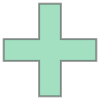

In [15]:
geometry = pygeos.polygons([(-8.5, 3), (-2, 3), (-2, 9.5), (2, 9.5), (2, 3), (8.5, 3), (8.5, -1), (2, -1), (2, -7.5), (-2, -7.5), (-2, -1), (-8.5, -1), (-8.5, 3)])

                    # <vertex px="-8.5" py="3"/>
                    # <vertex px="-2" py="3"/>
                    # <vertex px="-2" py="9.5"/>
                    # <vertex px="2" py="9.5"/>
                    # <vertex px="2" py="3"/>
                    # <vertex px="8.5" py="3"/>
                    # <vertex px="8.5" py="-1"/>
                    # <vertex px="2" py="-1"/>
                    # <vertex px="2" py="-7.5"/>
                    # <vertex px="-2" py="-7.5"/>
                    # <vertex px="-2" py="-1"/>
                    # <vertex px="-8.5" py="-1"/>
                    # <vertex px="-8.5" py="3"/>

geometry_pita = Geometry(geometry)
# geometry_pita.add_obstacle(pygeos.polygons([(-9, -2), (-9, 0), (9, 0), (9, -2), (-9, -2)]))
# geometry_pita.add_obstacle(pygeos.polygons([(-9, 5), (-9, 7), (9, 7), (9, 5), (-9, 5)]))

ma = pygeos.polygons([(-1.5, 0), (-1.5, 5), (1.5, 5), (1.5, 0), (-1.5, 0)])
ml = pygeos.linestrings([(2, -1), (2, 3)])
direction = np.array([-1, 0])

# traj = parse_trajectory(trajectory_file="demos/uni-directional/traj_UNI_CORR_500_01.txt")
traj = parse_trajectory(trajectory_file="fd_review/Bsp_Tobi_Crossing_bi/CROSSING_90_D_6.txt")

pygeos.to_shapely(geometry)

### Plot setup

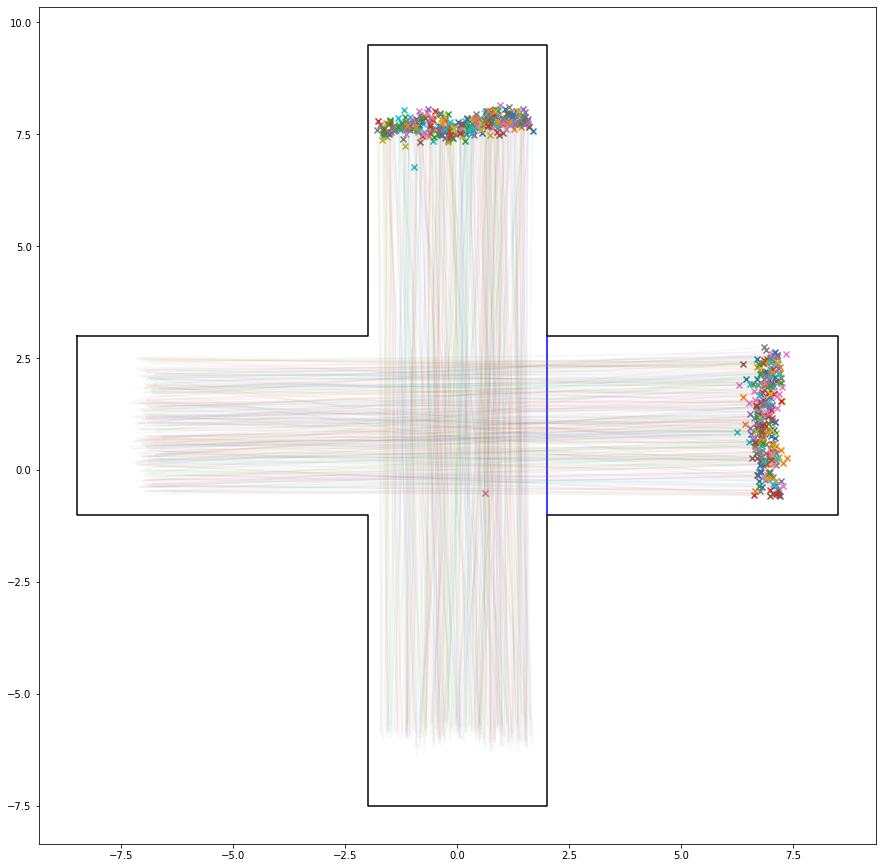

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 20))
ax1 = fig.add_subplot(111, aspect="equal")

# Plot geometry
ax1.plot(*pygeos.to_shapely(geometry_pita.walkable_area).exterior.xy, color="k")

## Plot measurement area
# ax1.plot(*pygeos.to_shapely(ma).exterior.xy, color="g")
# ax1.fill(*pygeos.to_shapely(ma).exterior.xy, color="g", alpha=0.1)

## Plot measurement lines
ax1.plot(*pygeos.to_shapely(ml).xy, color="b")
# ax1.plot(*pygeos.to_shapely(pygeos.offset_curve(ml, passing_offset)).xy, color="orange")

# Plot trajectories
for id, ped in traj.data.groupby("ID"):
    # p = ax1.plot(ped["X"], ped["Y"], label=id, alpha=0.1, color="r")

    p = ax1.plot([ped[ped.frame == ped.frame.min()]["X"], ped[ped.frame == ped.frame.max()]["X"]], [ped[ped.frame == ped.frame.min()]["Y"], ped[ped.frame == ped.frame.max()]["Y"]], alpha=0.05)
    ax1.scatter(
        ped[ped.frame == ped.frame.max()]["X"],
        ped[ped.frame == ped.frame.max()]["Y"],
        c=p[-1].get_color(),
        marker="x",
    )
plt.show()

In [53]:
movement = traj.data.groupby("ID")['points'].agg(['first', 'last'])
movement['movement'] = pygeos.linestrings([[tuple(start), tuple(end)] for start, end in
                                           zip(pygeos.get_coordinates(movement['first']),
                                               pygeos.get_coordinates(movement['last']))])

movement['main movement direction'] = 0
movement
#
#
# coordinates = pygeos.get_coordinates(measurement_line)
# normal_vector = np.array(
#     [-1 * (coordinates[1, 1] - coordinates[0, 1]), coordinates[1, 0] - coordinates[0, 0]]
# )
# normal_vector /= np.linalg.norm(normal_vector)
#
# movement["main movement direction"] = np.sign(
#     np.dot(
#         pygeos.get_coordinates(movement["end"]) - pygeos.get_coordinates(movement["start"]),
#         normal_vector,
#     )
# )
#
# movement[pygeos.intersects(movement["movement"], measurement_line)].merge(traj_data, on="ID")[
#     ["ID", "frame", "X", "Y", "Z", 'points', 'movement']]


,first,last,movement,main movement direction
ID,,,,
1,POINT (-6.666 2.044),POINT (7.076 2.434),"LINESTRING (-6.666 2.044, 7.076 2.434)",0
2,POINT (-1.025 -5.905),POINT (-0.893 7.643),"LINESTRING (-1.025 -5.905, -0.893 7.643)",0
3,POINT (-0.027 -5.691),POINT (0.195 7.499),"LINESTRING (-0.027 -5.691, 0.195 7.499)",0
4,POINT (1.683 -6.131),POINT (1.122 7.969),"LINESTRING (1.683 -6.131, 1.122 7.969)",0
5,POINT (1.666 -5.915),POINT (1.424 7.754),"LINESTRING (1.666 -5.915, 1.424 7.754)",0
...,...,...,...,...
596,POINT (-6.822 0.658),POINT (6.693 0.268),"LINESTRING (-6.822 0.658, 6.693 0.268)",0
597,POINT (1.261 -5.617),POINT (1.087 7.617),"LINESTRING (1.261 -5.617, 1.087 7.617)",0
598,POINT (0.908 -5.731),POINT (0.632 7.817),"LINESTRING (0.908 -5.731, 0.632 7.817)",0


In [36]:
traj.data.groupby("ID")['points'].agg(['first', 'last'])
# traj.data.groupby("ID")['points'].last()

,first,last
ID,,
1,POINT (-6.666 2.044),POINT (7.076 2.434)
2,POINT (-1.025 -5.905),POINT (-0.893 7.643)
3,POINT (-0.027 -5.691),POINT (0.195 7.499)
4,POINT (1.683 -6.131),POINT (1.122 7.969)
5,POINT (1.666 -5.915),POINT (1.424 7.754)
...,...,...
596,POINT (-6.822 0.658),POINT (6.693 0.268)
597,POINT (1.261 -5.617),POINT (1.087 7.617)
598,POINT (0.908 -5.731),POINT (0.632 7.817)


In [39]:
movement = traj.data.groupby("ID")['points'].agg(['first', 'last'])

# pygeos.linestrings(movement['first'], movement['last'])
# [pygeos.get_coordinates(movement['first']), pygeos.get_coordinates(movement['last'])],
movement['movement'] = pygeos.linestrings([[tuple(start), tuple(end)] for start, end in zip(pygeos.get_coordinates(movement['first']), pygeos.get_coordinates(movement['last']))])
movement.drop

pygeos.intersects(movement[movement], m)

ValueError: Boolean array expected for the condition, not object

In [42]:
traj.data

,ID,frame,X,Y,Z,points
0,1,868,-6.666,2.044,1.739,POINT (-6.666 2.044)
1,1,869,-6.632,2.049,1.739,POINT (-6.632 2.049)
2,1,870,-6.602,2.058,1.739,POINT (-6.602 2.058)
3,1,871,-6.574,2.069,1.739,POINT (-6.574 2.069)
4,1,872,-6.564,2.086,1.739,POINT (-6.564 2.086)
...,...,...,...,...,...,...
221838,600,1588,6.615,1.056,1.787,POINT (6.615 1.056)
221839,600,1589,6.642,1.071,1.787,POINT (6.642 1.071)
221840,600,1590,6.674,1.088,1.787,POINT (6.674 1.088)
221841,600,1591,6.738,1.103,1.787,POINT (6.738 1.103)


In [47]:
movement[pygeos.intersects(movement["movement"], ml)].merge(traj.data, on="ID")[["ID", "frame", "X", "Y", "Z", 'points', 'movement']]

,ID,frame,X,Y,Z,points,movement
0,1,868,-6.666,2.044,1.739,POINT (-6.666 2.044),"LINESTRING (-6.666 2.044, 7.076 2.434)"
1,1,869,-6.632,2.049,1.739,POINT (-6.632 2.049),"LINESTRING (-6.666 2.044, 7.076 2.434)"
2,1,870,-6.602,2.058,1.739,POINT (-6.602 2.058),"LINESTRING (-6.666 2.044, 7.076 2.434)"
3,1,871,-6.574,2.069,1.739,POINT (-6.574 2.069),"LINESTRING (-6.666 2.044, 7.076 2.434)"
4,1,872,-6.564,2.086,1.739,POINT (-6.564 2.086),"LINESTRING (-6.666 2.044, 7.076 2.434)"
...,...,...,...,...,...,...,...
93378,600,1588,6.615,1.056,1.787,POINT (6.615 1.056),"LINESTRING (-6.682 0.918, 6.776 1.121)"
93379,600,1589,6.642,1.071,1.787,POINT (6.642 1.071),"LINESTRING (-6.682 0.918, 6.776 1.121)"
93380,600,1590,6.674,1.088,1.787,POINT (6.674 1.088),"LINESTRING (-6.682 0.918, 6.776 1.121)"
93381,600,1591,6.738,1.103,1.787,POINT (6.738 1.103),"LINESTRING (-6.682 0.918, 6.776 1.121)"


# Density

## Classic density

In [10]:
from report.methods.density_calculator import compute_classic_density

classic_density = compute_classic_density(traj.data, ma)
classic_density

,classic density
frame,
112,0.0
113,0.0
114,0.0
115,0.0
116,0.0
...,...
3665,0.0
3666,0.0
3667,0.0


In [ ]:
classic_density.reset_index().plot.line(x="frame", y="classic density")

## Voronoi density

In [ ]:
from report.methods.density_calculator import compute_voronoi_density

density_voronoi, individual = compute_voronoi_density(traj.data, ma, geometry_pita)

In [ ]:
density_voronoi

In [ ]:
individual

In [ ]:
density_voronoi.reset_index().plot.line(x="frame", y="voronoi density")

## Comparision

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.plot(
    classic_density.reset_index().frame,
    classic_density["classic density"].values,
    label="classic",
    lw=3,
)
plt.plot(
    density_voronoi.reset_index().frame, density_voronoi["voronoi density"], label="voronoi", lw=3
)
plt.xlabel("frame")
plt.ylabel("rho / 1/m^2")
plt.legend()
plt.grid()
plt.show()

## Plot voronoi cells

In [ ]:
import pandas as pd

frame_start = 1200

for frame in range(frame_start, frame_start + 100, 20):
    df_frame = individual[individual.frame == frame]
    df_frame = pd.merge(traj.data, df_frame, on=["ID", "frame"])

    fig = plt.figure(figsize=(15, 20))
    ax1 = fig.add_subplot(111, aspect="equal")

    ax1.plot(*pygeos.to_shapely(geometry).exterior.xy, color="k")
    ax1.plot(*pygeos.to_shapely(ma).exterior.xy, color="k")

    for _, row in df_frame.iterrows():
        p = ax1.plot(*pygeos.to_shapely(row[6]).exterior.xy)
        ax1.scatter(row[2], row[3])
        ax1.add_patch(
            PolygonPatch(
                pygeos.to_shapely(row[6]), alpha=0.1, zorder=2, fc=p[-1].get_color(), ec="none"
            )
        )
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    plt.show()

# Velocity

In [ ]:
from report.methods.velocity_calculator import compute_individual_velocity

individual_speed = compute_individual_velocity(traj.data, traj.frame_rate, 5)
individual_speed

In [ ]:
individual_speed.reset_index().plot.scatter(x="frame", y="speed")

In [ ]:
individual_speed_direction = compute_individual_velocity(traj.data, traj.frame_rate, 5, direction)
individual_speed_direction

In [ ]:
individual_speed.reset_index().plot.scatter(x="frame", y="speed")

## Mean speed (all)

In [ ]:
from report.methods.velocity_calculator import compute_mean_velocity_per_frame

mean_speed, individual_speed = compute_mean_velocity_per_frame(traj.data, traj.frame_rate, 5)
mean_speed

In [ ]:
mean_speed.reset_index().plot.scatter(x="frame", y="speed")

In [ ]:
mean_speed_direction, individual_speed_direction = compute_mean_velocity_per_frame(
    traj.data, traj.frame_rate, 5, direction
)
mean_speed_direction

## Mean speed (in measurement area)

In [ ]:
from report.methods.method_utils import get_peds_in_area
from report.methods.velocity_calculator import compute_mean_velocity_per_frame

peds_in_area = get_peds_in_area(traj.data, ma)
mean_speed_area, individual_speed_area = compute_mean_velocity_per_frame(
    peds_in_area, traj.frame_rate, 5
)

In [ ]:
mean_speed_area.reset_index().plot.scatter(x="frame", y="speed")

In [ ]:
mean_speed_area_direction, individual_speed_area_direction = compute_mean_velocity_per_frame(
    peds_in_area, traj.frame_rate, 5, direction
)

In [ ]:
mean_speed_area_direction.reset_index().plot.scatter(x="frame", y="speed")

## Voronoi speed

In [ ]:
from report.methods.density_calculator import (
    _compute_individual_voronoi_polygons,
    _compute_intersecting_polygons,
)
from report.methods.velocity_calculator import compute_individual_velocity, compute_voronoi_velocity

In [ ]:
individual_voronoi = _compute_individual_voronoi_polygons(traj.data, geometry_pita)
intersecting_voronoi = _compute_intersecting_polygons(individual_voronoi, ma)

In [ ]:
voronoi_velocity = compute_voronoi_velocity(traj.data, intersecting_voronoi, traj.frame_rate, 5, ma)
voronoi_velocity

In [ ]:
voronoi_velocity.reset_index().plot.scatter(x="frame", y="voronoi speed")

In [ ]:
voronoi_velocity_direction = compute_voronoi_velocity(
    traj.data, intersecting_voronoi, traj.frame_rate, 5, ma, direction
)
voronoi_velocity_direction

## Comparison mean velocity vs voronoi velocity

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(voronoi_velocity.reset_index().frame, voronoi_velocity, label="voronoi")
plt.scatter(
    voronoi_velocity_direction.reset_index().frame,
    voronoi_velocity_direction,
    label="voronoi direction",
)
plt.scatter(mean_speed_area.reset_index().frame, mean_speed_area, label="classic")
plt.scatter(
    mean_speed_area_direction.reset_index().frame,
    mean_speed_area_direction,
    label="classic direction",
)
plt.xlabel("frame")
plt.ylabel("v / m/s")
plt.legend()
plt.grid()
plt.show()

# CCM

In [ ]:
from report.methods.method_CCM import _run_method_ccm
from report.data.configuration import ConfigurationMethodCCM, ConfigurationVelocity

In [ ]:
config_ccm = ConfigurationMethodCCM(0.05, 0)
config_velocity = ConfigurationVelocity(10, np.array([1, 0]), False)
line = pygeos.linestrings([[0, 0], [0, 5]])

In [ ]:
mean, individual = _run_method_ccm(config_ccm, traj, line, geometry_pita, config_velocity)

In [ ]:
mean.plot()